# Lab 8

# The BA model and introduction to centrality measures 

---

# __The Barabási–Albert model__ 

The Barabási-Albert (BA) model, introduced by László Barabási-Albert and Réka Albert in [this paper](https://science.sciencemag.org/content/286/5439/509.full),  was inspired by the __[scale-free property](https://en.wikipedia.org/wiki/Scale-free_network)__ of real networks. The novelty of the model is the __growth__ and the __preferential attachment__ mechanism. Growth means, that (in contrast to the Erdős–Rényi), the number of nodes in the BA network increases over time.

The preferential attachment mechanism (also referred to as "the  rich get richer" or "Yule process") means that the newcomer nodes are more likely to connect to nodes with higher degree, i.e. the more connected a node is, the more likely it receives new links. This phenomena is well discernible in social networks, where a newcomer to a community is more likely to be acquainted with one of the more "visible" or socially active/friendly persons.

### __Algorithm of the model:__

Two parameters: $n$: number of nodes, and $m$: initial number of neighbours of a newcomer node

*  __Initial condition__: The model starts with a small network of $m_0$ nodes.
* __Growth__: At each iteration step, a newcomer node $v$ is added to the network and is connected to $u_1,\ldots, u_m$, $m\leq m_0$ existing nodes, with probability that is proportional to the degree of the $u_i$ nodes, i.e. the $p_i$ probability, that $v$ is connected to the node $u_i$ is
    $$ p_i = \frac{\deg (u_i)}{\sum_j \deg(v_j)},$$
    where the sum is made over all already existing $v_j$ 

Heavily linked nodes ("hubs") tend to quickly accumulate even more links, while nodes with only a few links are unlikely to be chosen as the destination for a new link. The new nodes have a "preference" to attach themselves to the already heavily linked nodes.

The steps of the growth of the network according to the Barabasi–Albert model $m_0=m=2$:

![ba_model_growth](https://upload.wikimedia.org/wikipedia/commons/4/48/Barabasi_Albert_model.gif)

### __Goal of the following exercises__

1. Understand the mechanism of the Barabási-Albert model
2. Check the scale-free property of the model
3. Check the small-world property of the model

In [1]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from scipy.optimize import curve_fit 

# __Exercise 1__

__Implement the Barabási-Albert model!__ Let the initial graph be a [path graph](https://en.wikipedia.org/wiki/Path_(graph_theory)) of $m$ nodes if $m\geq 2$, if $m=1$ then the initial graph should consist of 2 nodes. (you can create it with [nx.path_graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.path_graph.html))

The function should have 2 input parameters: ```n``` and ```m``` denoting the number of nodes and the number of new neighbors respectively. 

Note that there are two possible implementations:
1. Update the degrees/probabilities after each attachment of a single edge $(v,\, u_i), \, \, i=1,\ldots,m$ 
2. Update the degrees/probabilities only at the beginning of each iteration, i.e. only before the attachment of all $(v,\, u_i), \, \, i=1,\ldots,m$   

The second one is easier to implement.

__If you feel lost, here are some hints:__
1. if $m < 1$ or $m \geq n$ then the function should print out that "Barabási-Albert network must have m>=1 and m<n"
2. Create an initial graph
3. Until the graph has less than `n` nodes do the following:
    1. Get the degrees of the nodes ([graph.degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html))
    2. Based on the degrees calculate the corresponding probabilities
    3. With the help of `np.random.choice` get the $u_1, u_2,\ldots,u_m$ newighbours of the newcomer $v$ node
    4. Create the new edges, i.e. ```[(v, u_1), (v, u_2), ... , (v, u_m)]```
    5. Add these new edges to the graph ([graph.add_edges_from](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.add_edges_from.html#networkx.Graph.add_edges_from))

You can draw your network with: [nx.draw(graph, node_size=25)](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw)

__This should take you about 20-25 minutes!__

# Degree distribution and scale-free property 

__Definition__ (Degree distribution)

The degree distribution is the probability distribution of these degrees over the whole network.

The degree distribution $P(k)$ of a network is  defined to be the fraction of nodes in the network with degree $k$. Thus if there are $n$ nodes in total in a network and $n_k$ of them have degree $k$, we have $$P(k) = \frac{n_k}{n}.$$

__Definition__ (Scale-free property)

A scale-free network is a network whose degree distribution follows a power-law, at least asymptotically. That is, 
$$P(k)  \sim  k^{-\gamma},$$
where $\gamma$  is a parameter.

__Note__: In a [log-log scale plot](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot) the power-law function is a straight line, and its slope is the exponent, since
$$\log P(k) \sim -\gamma \log k $$

Setting $X = \log k$ and $Y = \log P(k)$ yields $Y \sim -\gamma X$

__Theorem__

The Barabási-Albert model is scale-free, i.e. the degree distribution resulting from the BA model is a power-law of the form
$$P(k)\sim k^{-3}$$

__Note__ : The $G(n, p)$ Erdős-Rényi model has binomal degree distribution:  $P(k)=\binom{n-1}{k}p^{k}(1-p)^{n-1-k}$

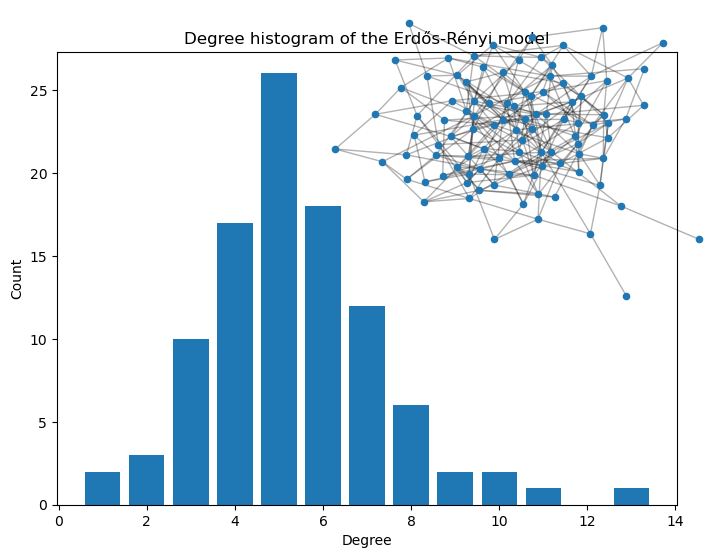

In [93]:
G = nx.fast_gnp_random_graph(100, 6/100)

degree_sequence = list(dict(G.degree).values())
degreeCount = dict(Counter(degree_sequence))
deg, cnt = degreeCount.keys(), degreeCount.values()

plt.figure(figsize=(8, 6), dpi=100)
plt.bar(deg, cnt, width=0.80)

plt.title("Degree histogram of the Erdős-Rényi model")
plt.ylabel("Count")
plt.xlabel("Degree")

# draw graph in inset
plt.axes([0.45, 0.45, 0.5, 0.5])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show()

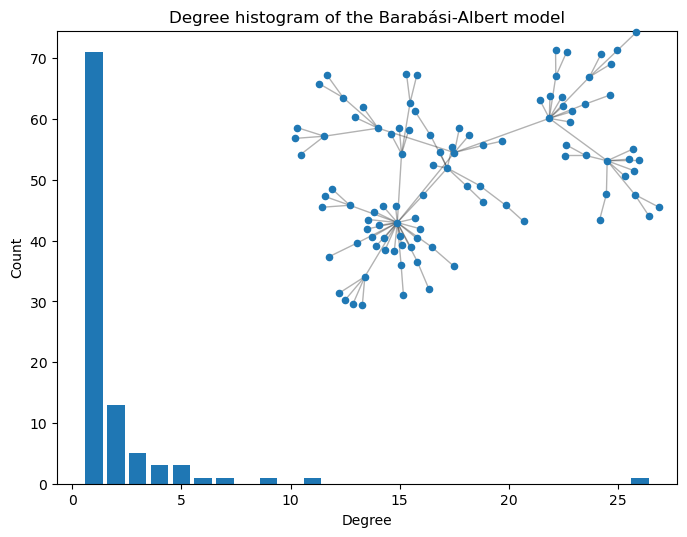

In [120]:
G = nx.barabasi_albert_graph(100, 1)

degree_sequence = list(dict(G.degree).values())
degreeCount = dict(Counter(degree_sequence))
deg, cnt = degreeCount.keys(), degreeCount.values()

plt.figure(figsize=(8, 6), dpi=100)
plt.bar(deg, cnt, width=0.80)

plt.title("Degree histogram of the Barabási-Albert model")
plt.ylabel("Count")
plt.xlabel("Degree")

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])

pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.3)

plt.show()

# __Exercise 2__ 

1. Generate a Barabasi-Albert graph with ```n=2000``` and ```m=50``` parameter setting. If your implementation does not work or very slow, then you can use the built-in function: [nx.barabasi_albert_graph(n, m)](https://networkx.github.io/documentation/networkx-2.3/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph). 
2. Plot the histogram of the degrees of the generated graph (use `plt.hist` with 16 bins)
3. Plot the degree distribution of the generated graph on a scatter plot. (Use the ```Counter``` function to get the counts of the degrees). Unfortunatelly, the automatic range of the y-axis is not always the best, you can correct it with [plt.ylim(bottom, top)](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylim.html), e.g. ```plt.ylim(-0.001, 0.043)```.
    1. Duplicate your scatter plot, and set the scaling of both axes to logarithmic (log-log scale). __Hint__: type ```plt.xscale('log')``` and ```plt.yscale('log')```. <br> Probably you will have to reset the range of the y-axis.

__This should take you about 10 minutes!__

# __Exercise 3a__ 

Check the statement of the following theorem:

__Theorem__

The Barabási-Albert model is scale-free, i.e. the degree distribution resulting from the BA model is a power-law of the form
$$P(k)\sim k^{-3}$$

i.e. fit a power-law curve to the degree distribution of the graph, generated in __Exercise 2__.


__Task and hints:__
1. Use the given ```test_pow_law``` and the ```curve_fit``` function. 
    * The $x$ and $y$ variables in the ```curve_fit``` function should be the $x$ and $y$ variables plotted in the previous exercise, i.e. the degrees ($k$) and the degree distribution $P(k)$ <br> Is the fitted exponent (parameter b) close to the theoretical value ($\gamma = -3$)? 
2. Plot the degree distribution on a scatter plot (as in the previous exercice), and also plot the fitted power-law curve on the this figure.
    * Set the color of the fitted curve to red (```c='r'```), and its linestyle to dashed (```lw='--'```)

__This should take you about 10-12 minutes!__

In [97]:
def test_pow_law(x, a, b, c):
    return a*x**(-b) + c

# __Exercise 3b__ 

Since power-law looks linear on log-log scale, unfortunatelly, in practice the exponent is often estimated via linear regression on the logarithm of the degree distribution and the logarithm of the degrees, but this method produces inaccurate estimates. 

__Task__

Repeat __Exercise 3a__, but now fit a line to the logarithm of the data (i.e. set $x = \log k$, and $y=\log P(k)$):

1. Calculate the logarithm of the degree distribution and the corresponding degrees, and save them in numpy arrays.
2. Similarly to __Ex 3b__ use the ```test_lin``` function to fit a line to the logarithic data. <br>  Is the fitted exponent (parameter a) close to the theoretical value 
3. Plot the fitted line and the logarithmic data on a figure. 

__This should take you about 5 minutes!__

In [106]:
def test_lin(x, a, b):
    return a*x + b

__Note__ that there are more sophisticated methods to fit power-law distribution as described [here](https://arxiv.org/abs/0706.1062) and [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5330461/). There is a [python module](https://github.com/jeffalstott/powerlaw), called [powerlaw](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777), to determine if a probability distribution fits a power-law.  

# __Exercise 4__ 

__Definition__ (small-world property)

A network is said to be small-world, if the "typical" distance $L$ (i.e. the average length of shortest paths) between any two nodes grows proportionally to the logarithm of the size of the network i.e. $L \sim \log |V|$, where $V$ is the set of nodes. 

__Note__ that scale-free networks are ultra-small worlds, i.e. due to hubs, the shortest paths become significantly smaller and scale as $L \sim \log \log |V|$

__Theorem__

The average path length of the BA model increases approximately logarithmically with the size of the network, i.e. the average shortest path length of a BA(n, m) network is of order $\log n$. Moreover if $m>1$ the BA is ultra-small world. The actual form of $L$ has a double logarithmic correction and goes as
$$L\sim {\frac{\log n}{\log \log n}}$$

Investigate how the average shortest path length grows with the number of nodes $n$, for $m = 1, 2,$ and $9$!
1. Let ```network_sizes = range(10, 410, 10)```. 
2. Create three lists of average path lengths corresponding to the three values of m, i.e. <br> For m = 1, 2, 9:
    * Calculate the average shortest path length of BA(n, m) networks ```for n in network_sizes``` and save it in a list variable. 
3. On a single figure plot the following:
    1. The average shortests path lengths (y-axis) against the network sizes (x-axsis), i.e. the previously calculated three lists.
        * Set the labels as ```label='m=1'```, ```label='m=2'```, and ```label='m=9'``` correspondingly. 
    2. Plot the following curve:
        * $f(x)= \log(x)$, set its color to red, and its label to ```'log(n)'``` <br> __Hint__: Let x be ```np.linspace(10, 400, 400)```, then you can calculate $f(x)$ as ```np.log(x)``` 
        
        
4. Set the label of the x-axis to 'Number of nodes', and the label of the y-axis to 'Average shortest path length', and set the size of the figure to (10,8) (you can do it by typing ```plt.figure(figsize=(10,8))``` in the first line.

__This should take you about 15 minutes!__

---

---

---

# __Centrality measures__ 

In [1]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import operator
from scipy.spatial import distance

In [2]:
import pydot 

# Centrality measures 

In graph theory and network analysis, centrality measures identify the most important and influential nodes within a graph. 

Applications include identifying
* the most influential person(s) in a social network, 
* key infrastructure nodes in the Internet or urban networks, 
* super-spreaders of disease or information. 

There are several ways to characterize the importance of a vertex. Generally, centrality measures are real-valued function on the vertices of a graph, where the values produced are expected to provide a ranking which identifies the most important nodes. The larger the centrality measure is, the more central/important a node is.  

Today we will cover the most frequently used centrality measures. Historically first and conceptually simplest is the degree centrality:

__Definition__ (Degree centrality)

The degree centrality for a node $v$ is the fraction of nodes it is connected to, i.e.
$$C_{\mathrm{deg}}(v) = \frac{\mathrm{deg}(v)}{n-1} $$

The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph $n-1$, where $n$ is the number of nodes in the graph.

# __Exercise 5__

Goal is to draw a graph and color its nodes according to their centrality.

1. Calculate (and save in a variable) the degree centralities of the nodes of [Zachary's karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) graph: [nx.karate_club_graph()](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html?highlight=karate_club#networkx.generators.social.karate_club_graph). You can simply calculate the degree centralities of a graph with the [nx.degree_centrality](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality) function, which returns a dictionary where the keys are the nodes and the values are the corresponding centralities.
2. Draw the graph and color the nodes by their degree centrality:
    1. Calculate the positions of the nodes and save it in a variable: use ```nx.drawing.nx_pydot.graphviz_layout``` if pydot is installed on your computer. Otherwise, you can use ```nx.spring_layout```
    2. Draw the graph with ```nx.draw```, and color the nodes by the degree centrality: set the ```node_color``` parameter of ```nx.draw``` to be a list containing the degree centralities of the nodes.
    3. You can change the colors of the nodes by setting the ```cmap``` parameter of ```nx.draw``` to another [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html). Try another colormaps e.g.  ```plt.cm.YlOrRd```,```plt.cm.plasma```, ```plt.cm.inferno```,```plt.cm.RdYlBu_r```, ```plt.cm.RdYlBu_r```, ```plt.cm.coolwarm```, ```plt.cm.Spectral```.

__This should take you about 10-12 minutes!__

# __Exercise 6a__ 

Write a function, called ```node_with_highest_centrality```, which has one input: ```centralities_dict``` dictionary of centralities (keys: nodes, values: centralities). 

The function should return the name of the node with the highest centrality measure.

Hint:
* The ```.items()``` function of dictionaries returns its keys and values in an array of tuples.
* You should use the built-in [max](https://www.programiz.com/python-programming/methods/built-in/max) function with a well-chosen ```key``` function, because by default ```max(centralities_dict)``` would return the maximum of the keys, and ```max(centralities.values())``` would return the largest key and its value in a tuple. The ```key``` function is an optional argument of the ```max``` function and this is where the iterables are passed and comparison is performed based on its return value. 
* Hint for the key function: you can use a [lambda function](https://www.w3schools.com/python/python_lambda.asp) or you can use [operator.itemgetter](https://docs.python.org/3/library/operator.html#operator.itemgetter). Maybe [this page](https://stackoverflow.com/questions/18595686/how-does-operator-itemgetter-and-sort-work-in-python) and [this one](https://stackoverflow.com/questions/8459231/sort-tuples-based-on-second-parameter) are also useful.

__This should take you about 10-12 minutes!__

In [7]:
centralities = nx.degree_centrality(nx.barabasi_albert_graph(8,1))

In [8]:
centralities

{0: 0.2857142857142857,
 1: 0.5714285714285714,
 2: 0.14285714285714285,
 3: 0.2857142857142857,
 4: 0.2857142857142857,
 5: 0.14285714285714285,
 6: 0.14285714285714285,
 7: 0.14285714285714285}

The max function returns the largest key of a dictionary

In [9]:
max(centralities)

7

The max function applied to the items of a dictionary returns the largest key and its value in tuple

In [10]:
max(centralities.items())

(7, 0.14285714285714285)

The largest value is:

In [11]:
max(centralities.values())

0.5714285714285714